In [71]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2022-07-31'

# Tickers of assets
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS	VEDL.NS	WIPRO.NS ^BSESN""".split()
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  29 of 29 completed


In [72]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS,^BSESN
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.8610%,-7.2010%,-0.3105%,0.5421%,8.0027%,5.2200%,-3.4207%,2.2353%,3.7927%,-1.1484%,...,0.2936%,-1.3406%,-2.4092%,-3.9446%,0.1954%,-1.0823%,-5.3308%,-1.4181%,8.0005%,2.1562%
2000-01-05,-2.6022%,-2.8475%,-2.5512%,-2.0611%,-3.7386%,8.0740%,-4.7476%,-3.9413%,7.9969%,-3.5576%,...,-4.4003%,-3.5102%,-4.1659%,2.4255%,1.9506%,3.8130%,-6.1058%,-0.6103%,1.6298%,-2.4405%
2000-01-06,-2.4809%,5.6536%,6.8476%,-5.5190%,5.9628%,8.0108%,2.7690%,0.8086%,7.8264%,4.0138%,...,1.4354%,-0.0973%,3.3431%,4.1501%,3.1250%,7.4736%,8.0202%,4.6491%,-1.9347%,1.2046%
2000-01-07,-4.8924%,-0.1183%,7.9997%,-7.9876%,-7.9715%,7.7500%,-3.5412%,0.0297%,4.4351%,5.4519%,...,-7.9623%,-7.9991%,7.9729%,8.0144%,-0.1855%,2.1991%,-2.1070%,-2.3470%,-7.9990%,-0.1300%
2000-01-10,3.0864%,1.3426%,7.5074%,-3.3385%,-1.6480%,1.3148%,-0.5586%,-1.4553%,-6.5802%,0.7584%,...,-1.8245%,-4.5933%,0.8827%,7.8991%,7.0012%,5.9901%,-0.9908%,2.1459%,0.1353%,1.9191%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [73]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS,^BSESN
weights,3.9040%,0.0000%,14.6912%,0.9865%,1.4134%,0.2992%,0.0000%,11.5070%,0.0000%,2.1924%,...,0.6292%,13.3124%,0.0000%,0.0000%,0.0000%,2.7310%,9.0585%,5.0970%,0.0000%,0.0000%


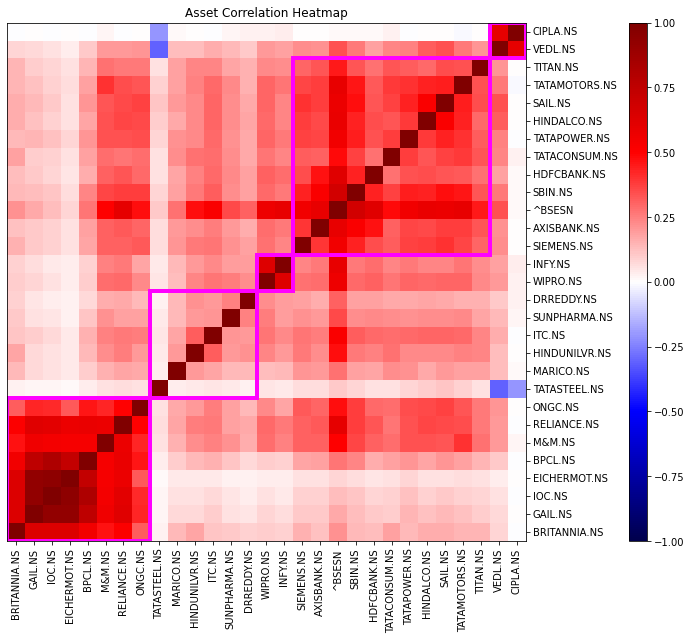

In [79]:
ax = rp.plot_clusters(returns=Y, title="Asset Correlation Heatmap",
                      leaf_order=True, cmap="seismic", dendrogram=False, ax=None)


In [75]:
# Risk contribution constraints vector
b = None

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS,^BSESN
weights,3.9040%,0.0000%,14.6912%,0.9865%,1.4134%,0.2992%,0.0000%,11.5070%,0.0000%,2.1924%,...,0.6292%,13.3124%,0.0000%,0.0000%,0.0000%,2.7310%,9.0585%,5.0970%,0.0000%,0.0000%


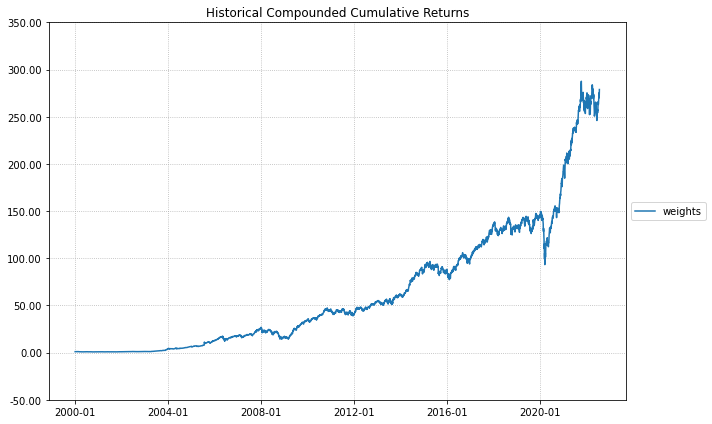

In [76]:
cagr_graph = rp.plot_series(returns=Y, w=w_rp, cmap='tab20', height=6, width=10,
                            ax=None)


### 3.2 Plotting portfolio composition

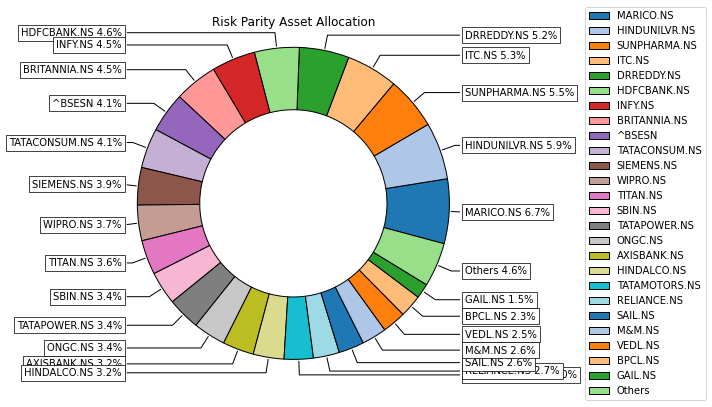

In [77]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Asset Allocation', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)

### 3.3  Plotting Risk Composition

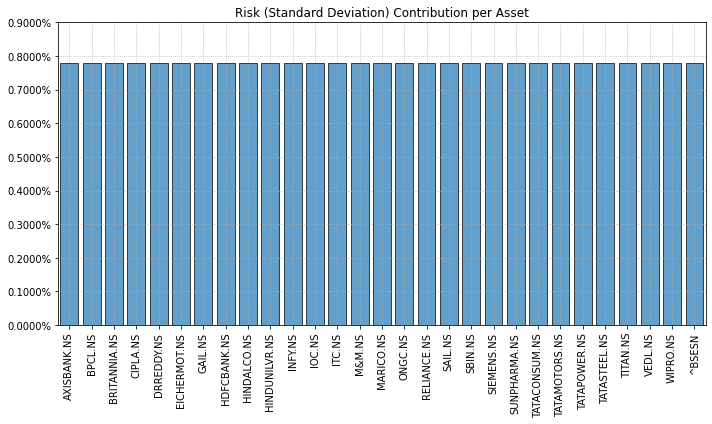

In [78]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)